In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import jsonpickle

In [65]:
# get all files under src/round1
files = glob.glob('src/round5/round-5-island-data-bottle/*.csv')
files

['src/round5/round-5-island-data-bottle\\trades_round_1_day_-1_wn.csv',
 'src/round5/round-5-island-data-bottle\\trades_round_1_day_-2_wn.csv',
 'src/round5/round-5-island-data-bottle\\trades_round_1_day_0_wn.csv',
 'src/round5/round-5-island-data-bottle\\trades_round_3_day_0_wn.csv',
 'src/round5/round-5-island-data-bottle\\trades_round_3_day_1_wn.csv',
 'src/round5/round-5-island-data-bottle\\trades_round_3_day_2_wn.csv',
 'src/round5/round-5-island-data-bottle\\trades_round_4_day_1_wn.csv',
 'src/round5/round-5-island-data-bottle\\trades_round_4_day_2_wn.csv',
 'src/round5/round-5-island-data-bottle\\trades_round_4_day_3_wn.csv']

In [66]:
round_1_files = glob.glob('src/round1/round-1-island-data-bottle/*.csv')

In [67]:
round_1_files

['src/round1/round-1-island-data-bottle\\prices_round_1_day_-1.csv',
 'src/round1/round-1-island-data-bottle\\prices_round_1_day_-2.csv',
 'src/round1/round-1-island-data-bottle\\prices_round_1_day_0.csv',
 'src/round1/round-1-island-data-bottle\\trades_round_1_day_-1_nn.csv',
 'src/round1/round-1-island-data-bottle\\trades_round_1_day_-2_nn.csv',
 'src/round1/round-1-island-data-bottle\\trades_round_1_day_0_nn.csv']

In [68]:
r1_quote = []
for file in round_1_files:
    if 'prices' in file:
        print(file)
        df = pd.read_csv(file,sep=';',index_col=0)
        r1_quote.append(df)

src/round1/round-1-island-data-bottle\prices_round_1_day_-1.csv
src/round1/round-1-island-data-bottle\prices_round_1_day_-2.csv
src/round1/round-1-island-data-bottle\prices_round_1_day_0.csv


In [69]:
r1_quote = pd.concat(r1_quote).reset_index()

In [86]:
r1_quote.set_index(['day','timestamp'],inplace=True)

In [81]:
r1=[]
for file in files:
    if 'round_1' in file:
        print(file)
    df = pd.read_csv(files[0],sep=';',index_col=0)
    r1.append(df)
r1 = pd.concat(r1,keys=[-1,-2,0],names=['day']).reset_index()

src/round5/round-5-island-data-bottle\trades_round_1_day_-1_wn.csv
src/round5/round-5-island-data-bottle\trades_round_1_day_-2_wn.csv
src/round5/round-5-island-data-bottle\trades_round_1_day_0_wn.csv


C:\Users\KaiwenShen\AppData\Local\Temp\ipykernel_32588\1788087103.py:7: FutureWarning: The behavior of pd.concat with len(keys) != len(objs) is deprecated. In a future version this will raise instead of truncating to the smaller of the two sequences
  r1 = pd.concat(r1,keys=[-1,-2,0],names=['day']).reset_index()


# To see individual player:

In [82]:
player = 'Valentina'
product = 'STARFRUIT'

In [83]:
r1[((r1['buyer']==player)|(r1['seller']=='player'))&(r1['symbol']==product)]

,day,timestamp,buyer,seller,symbol,currency,price,quantity
9,-1,2400,Valentina,Remy,STARFRUIT,SEASHELLS,5038.0,1
15,-1,3100,Valentina,Remy,STARFRUIT,SEASHELLS,5037.0,2
16,-1,3200,Valentina,Remy,STARFRUIT,SEASHELLS,5037.0,1
21,-1,3800,Valentina,Amelia,STARFRUIT,SEASHELLS,5037.0,14
22,-1,3800,Valentina,Remy,STARFRUIT,SEASHELLS,5037.0,1
...,...,...,...,...,...,...,...,...
16092,0,996000,Valentina,Vinnie,STARFRUIT,SEASHELLS,5043.0,6
16098,0,996500,Valentina,Vinnie,STARFRUIT,SEASHELLS,5041.0,4
16099,0,997200,Valentina,Remy,STARFRUIT,SEASHELLS,5039.0,1
16100,0,997400,Valentina,Ruby,STARFRUIT,SEASHELLS,5039.0,4


<Axes: xlabel='day,timestamp'>

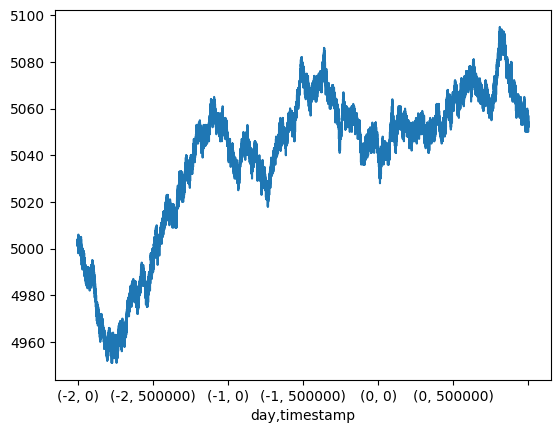

In [89]:
(r1_quote[r1_quote['product']==product]['ask_price_1']).plot()

ValueError: setting an array element with a sequence.

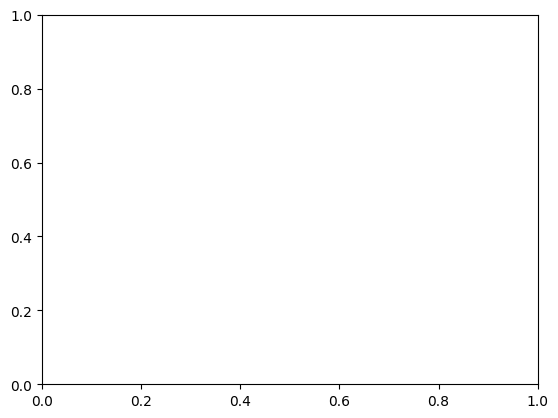

In [87]:
plt.plot(r1_quote[r1_quote['product']==product]['bid_price_1'],linewidth=0.1)
plt.plot(r1_quote[r1_quote['product']==product]['ask_price_1'],linewidth=0.1)

In [63]:
r1_quote

,date,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-1,-1,0,AMETHYSTS,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.0
1,-1,-1,0,STARFRUIT,5045,1,5040.0,31.0,NaN,NaN,5047,31,NaN,NaN,NaN,NaN,5046.0,0.0
2,-1,-1,100,STARFRUIT,5040,24,NaN,NaN,NaN,NaN,5046,2,5047.0,22.0,NaN,NaN,5043.0,0.0
3,-1,-1,100,AMETHYSTS,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,0.0
4,-1,-1,200,AMETHYSTS,9995,20,NaN,NaN,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,999700,STARFRUIT,5053,1,5048.0,26.0,NaN,NaN,5054,2,5055.0,24.0,NaN,NaN,5053.5,0.0
59996,0,0,999800,STARFRUIT,5047,27,NaN,NaN,NaN,NaN,5052,1,5054.0,27.0,NaN,NaN,5049.5,0.0
59997,0,0,999800,AMETHYSTS,9995,27,NaN,NaN,NaN,NaN,10005,27,NaN,NaN,NaN,NaN,10000.0,0.0
59998,0,0,999900,STARFRUIT,5048,2,5047.0,21.0,NaN,NaN,5054,23,NaN,NaN,NaN,NaN,5051.0,0.0


In [6]:
plt.plot(r1_quote[''])

,timestamp,buyer,seller,symbol,currency,price,quantity
0,0,Amelia,Valentina,STARFRUIT,SEASHELLS,5047.0,13
1,0,Remy,Valentina,STARFRUIT,SEASHELLS,5047.0,1
2,0,Remy,Vinnie,AMETHYSTS,SEASHELLS,10004.0,1
3,1100,Vinnie,Amelia,AMETHYSTS,SEASHELLS,9996.0,2
4,1700,Remy,Vladimir,AMETHYSTS,SEASHELLS,10002.0,1
...,...,...,...,...,...,...,...
5365,999200,Vladimir,Adam,STARFRUIT,SEASHELLS,5038.0,7
5366,999200,Remy,Adam,STARFRUIT,SEASHELLS,5043.0,1
5367,999200,Vinnie,Adam,STARFRUIT,SEASHELLS,5038.0,1
5368,999500,Rhianna,Valentina,STARFRUIT,SEASHELLS,5041.0,2


In [14]:
r1[r1.apply(lambda x: x['buyer'].startswith('V') and x['seller'].startswith('V'), axis=1)]

,timestamp,buyer,seller,symbol,currency,price,quantity
62,11800,Valentina,Vinnie,STARFRUIT,SEASHELLS,5043.0,4
231,45500,Valentina,Vinnie,STARFRUIT,SEASHELLS,5033.0,3
272,52600,Valentina,Vinnie,STARFRUIT,SEASHELLS,5032.0,4
314,61200,Valentina,Vinnie,STARFRUIT,SEASHELLS,5032.0,2
337,65400,Valentina,Vinnie,STARFRUIT,SEASHELLS,5030.0,3
...,...,...,...,...,...,...,...
5195,969100,Valentina,Vinnie,STARFRUIT,SEASHELLS,5047.0,2
5213,973900,Valentina,Vinnie,STARFRUIT,SEASHELLS,5045.0,4
5303,987700,Valentina,Vinnie,STARFRUIT,SEASHELLS,5045.0,4
5352,996000,Valentina,Vinnie,STARFRUIT,SEASHELLS,5043.0,6


In [21]:
r1['buyer'].unique()

array(['Amelia', 'Remy', 'Vinnie', 'Ruby', 'Valentina', 'Vladimir',
       'Rhianna', 'Adam'], dtype=object)

In [22]:
r1['seller'].unique()

array(['Valentina', 'Vinnie', 'Amelia', 'Vladimir', 'Remy', 'Ruby',
       'Rhianna', 'Adam'], dtype=object)

In [23]:
[ x for x in r1['buyer'].unique() if x not in r1['seller'].unique()]

[]